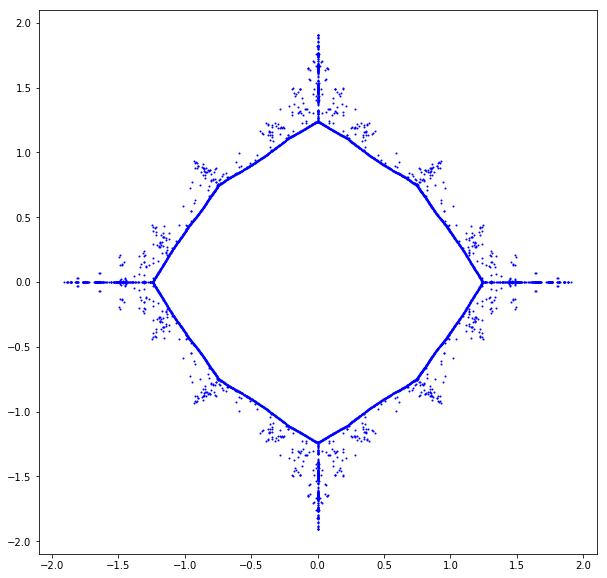

In [12]:
import numpy as np
import random
from scipy import sparse
import scipy.sparse.linalg
import matplotlib.pyplot as plt

n=4000
g=0.2
h_p=np.exp(g)
h_n=np.exp(-g)

hs_p=[h_n if random.random()>0.5 else -h_n for _ in range(n)]
hs_n=[h_p if random.random()>0.5 else -h_p for _ in range(n)]

m=np.zeros((n,n))
for i in range(0,n-1):
    m[i][i+1]=hs_n[i]
    m[i+1][i]=hs_p[i]
m[n-1][0]=hs_n[n-1]
m[0][n-1]=hs_p[n-1]

sm = sparse.lil_matrix(m)
eig_val, eig_vec = sparse.linalg.eigs(sm,k=3995)

plt.figure(figsize=(10,10))
for s in eig_val:
    plt.plot(np.real(s), np.imag(s),marker='.',color='blue',markersize=2)